# USER MANUAL:

## 1. Input Data File:

**WARNING**
***
The structure of the input data file is an already predefined layout. Based on that, Python programs were constructed to read the data from such files. For that reason under no circumstance the structure of the input file needs to be changed, otherwise the Python code will provide incorrect readings. Only the input values themselves can be changed.

**1.1 AVL FILES**
***
AVL is a program for the aerodynamic and flight-dynamic analysis of rigid aircraft of arbitrary configuration. It employs an extended vortex lattice model for the lifting surfaces, together with a slender-body model for fuselages and nacelles. The flight dynamic analysis combines a full linearization of the aerodynamic model about any flight state, together with specified mass properties.

AVL is used as an external software to obtain the aircraft loads through an aerodynamic simulation and use them as inputs for the structural sizing.

More information regarding AVL together with the executable software and the documentation can be found at the official webpage: https://web.mit.edu/drela/Public/web/avl/

The files to be extracted and fed into the structural sizing tool are:

- *total_forces_file_name*: Name of the file of total forces in ".txt" format. Obtained from AVL using the "FT" command.
- *shear_and_moment_file_name*: Name of the file of shear and moment strip forces in ".txt" format. Obtained from AVL using the "VM" command.
- *strip_forces_filename*: Name of the file containing the strip forces in ".txt" format. Obtained from AVL using the "FS" command.

<u>NOTE</u>: For a correct design, the simulation needs to be carried out at the most restrictive point of the flight envelope, that is where the conditions are more extreme, that is at the dive speed and maximum load factor.

**1.2 AIRFOIL FILE**
***
- *airfoil_points_file_name*: Name of the file in ".txt" format containing the horizontal and vertical coordinates of the selected airfoil. Coordinates need to be normalized, being the chord lentgth equal to 1. 

Database of airfoils can be obtained from the webpage: http://www.airfoiltools.com/.

**1.3 FLIGHT CONDITIONS DATA**
***
Conditions of the simulated point from AVL.
- *altitude_(m)*: Altitude of the simulated point of the flight envelope.
- *velocity_(m/s)*: Velocity of the simulated point of the flight envelope.
- *reference_surface_(m^2)*: Reference surface of the aircraft.
- *span_(m)*: Span of the aircraft.

**1.4 MATERIAL DATA**
***
- *stringer_yield_stress_(MPa)*: Yield stress of the material used for the stiffeners or stringers.
- *skin_yield_stress_(MPa)*: Yield stress of the material used for the skin panels.
- *stringer_elastic_modulus_(MPa)*: Elastic or Young modulus of the material used for the stiffeners or stringers.
- *skin_elastic_modulus_(MPa)*: Elastic or Young modulus of the material used for the skin panels.
- *stringer_material_density_(kg/m^3)*: Density of the material used for the stringer fabrication.
- *skin_material_density_(kg/m^3)*: Density of the material used for the skin fabrication.

**1.5 STRUCTURAL ELEMENTS DATA**
***
- *stringer_type*: Shape of the stiffeners, the available shapes are: Z, C, T, I.
- *web_minimum_length*: Minimum length of the stringer web to take into account for the sizing of the stiffeners.
- *web_maximum_length*: Maximum length of the stringer web to take into account for the sizing of the stiffeners.
- *flange_length_proportion*: Ratio between the length of the flange and the length of the web: $flange \; length \; proportion =  \frac{flange \; length}{web \; length}$
- *web_minimum_thickness*: Minimum thickness of the stringer web to take into account for the sizing of the stiffeners.
- *web_maximum_thickness*: Maximum thickness of the stringer web to take into account for the sizing of the stiffeners.
- *flange_thickness_proportion*: Ratio between the thickness of the flange and the thickness of the web: $flange \; thickness \; proportion =  \frac{flange \; thickness}{web \; thickness}$
- *stringer_reserve_factor*: Reserve factor for the stress of the stiffeners or stringers: $stringer \; reserve \; factor = \frac{stringer \; yield \; stress}{stringer \; actual \; stress}$
- *skin_minimum_thickness_(mm)*: Minimum thickness of the skin panels to take into account for the sizing process.
- *skin_maximum_thickness_(mm)*: Maximum thickness of the skin panels to take into account for the sizing process.
- *skin_reserve_factor*: Reserve factor for the stress of the skin panels: $skin \; reserve \; factor = \frac{skin \; yield \; stress}{skin \; actual \; stress}$

## 2. Use of the help function:

The coding is structured in two levels of functions:
- First level: Functions that perform simple and unique tasks, for example: reading inputs, calculate inertias, calculate the center of gravity, calculate the area given the geometrical parameters, etc... Such functions do not require of other coded funtions to perform their simple task.
- Second level: Nested functions, functions that perform a given calculation for which they need to call call simple functions.

The objective of that structure was to avoid multiple lines of code when it comes to perform repetitive tasks and also simplify the complex algorithms by dividing the execution in simpler functions.

Every function was described using the _Python Help_ command, such that anyone interested can know and understand how it works: what it does, the arguments that are required for the input and the arguments provided at the output. Such information can be directly seen by looking at the source code or by typing __help("function_name")__ in the Jupyter Notebook in order to obtain the information related to that particular function. In the next cells an example regarding this can be found.

## 3. Launching a calculation:

The first important comment is that for the correct functioning of the program all the files need to be placed at the same directory level, that is in the same folder. A recap of the needed files is provided here:
- functions.py
- main.py
- Total_Forces.txt
- Shear_Moment.txt
- Strip_Forces.txt
- Data_Input.txt
- NACA_XXXX.txt

Moreover, the __User_Manual.ipynb__ which is the current file the reader is looking at, is not needed for computation, just explanatory purpose.
Once all the inputs were correctly defined in the file __Data_Input.txt__ the computation is straight forward to launch, in just two lines from the _Jupyter Notebook_ command:
***
from main import *

run_calculation()
***
The first line will import all the modules contained in the _main.py_ and _function.py_ files while the second line will call the function that launches all the calculation.

A complete example of a run calculation is provided in the following cells.

In [3]:
from main import *
help(standard_atmosphere)

Help on function standard_atmosphere in module functions:

standard_atmosphere(altitude)
    DESCRIPTION: From the altitude and using the ISA model (International
                 Standard Atmosphere) calculates the air density, necessary
                 for obtaining the dynamic pressure and extract the real loads
                 and aerodynamic forces from their non-dimensional form.
                 The function includes a Troposphere model valid until 11.000
                 meters, a lower Stratosphere model valid from 11.000 to
                 25.000 meters and an upper Stratosphere model valid for altitudes
                 higher than 25.000 meters. For the further information about the
                 implementation of the models, the user is encouraged to consult
                 the ISA model by NASA, available in the link:
                 https://www.grc.nasa.gov/WWW/K-12/airplane/atmosmet.html
    INPUTS:
        * altitude: Flight altitude in meters.
    OUTPUTS:
   

                                         -----------------------
                                        |                       |
                                        | CALCULATION OF RIB 1 |
                                        |                       |
                                         -----------------------


 -----------------
| STRINGER SIZING |
 -----------------
Stringer optimization for obtention of preliminary dimensions:
-----------------------------------
Optimization terminated successfully    (Exit mode 0)
            Current function value: [42.0105321]
            Iterations: 7
            Function evaluations: 9
            Gradient evaluations: 7
Optimization Complete
-----------------------------------
Number of stringers: 3
Web length: 10.36 mm
Web thickness: 1.0 mm
Flange length: 5.18 mm
Flange thickness: 1.0 mm


Stringer crippling check:
-----------------------------------
Stringer dimensions are not prone to suffer stringer crippling.
Stringer sizi

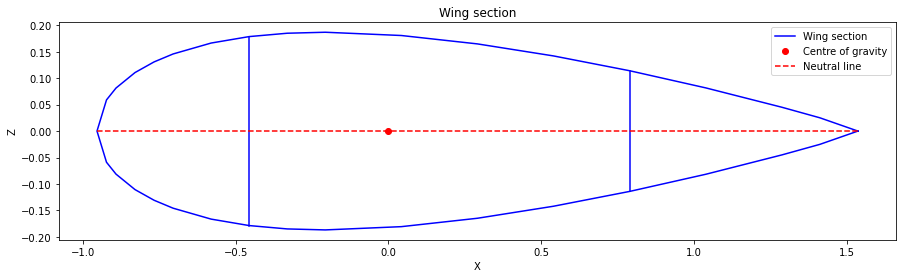

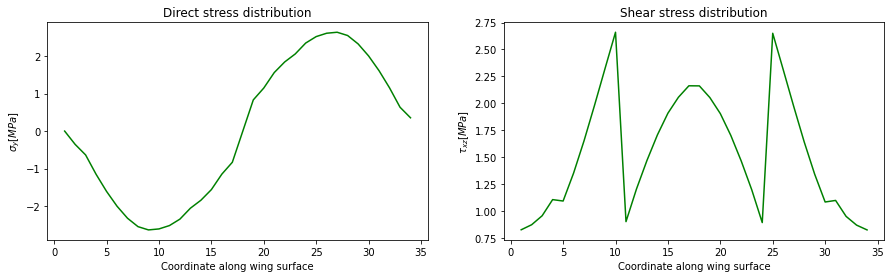

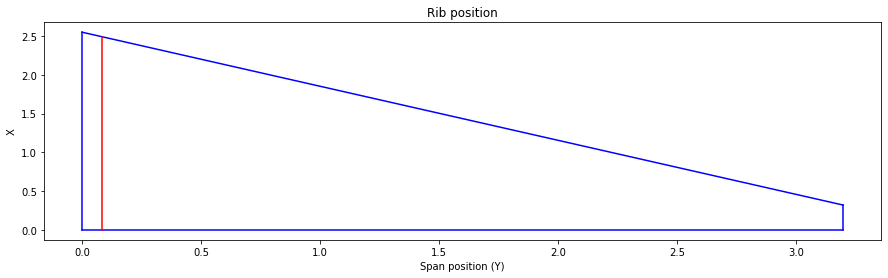





                                         -----------------------
                                        |                       |
                                        | CALCULATION OF RIB 2 |
                                        |                       |
                                         -----------------------


 -----------------
| STRINGER SIZING |
 -----------------
Stringer optimization for obtention of preliminary dimensions:
-----------------------------------
Optimization terminated successfully    (Exit mode 0)
            Current function value: [34.45699065]
            Iterations: 7
            Function evaluations: 9
            Gradient evaluations: 7
Optimization Complete
-----------------------------------
Number of stringers: 2
Web length: 10.15 mm
Web thickness: 1.0 mm
Flange length: 5.08 mm
Flange thickness: 1.0 mm


Stringer crippling check:
-----------------------------------
Stringer dimensions are not prone to suffer stringer crippling.
Stringer

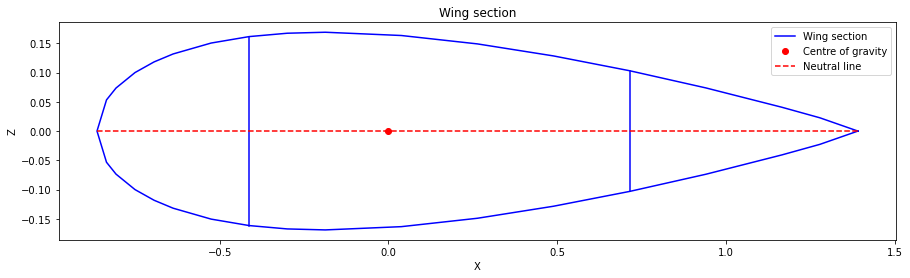

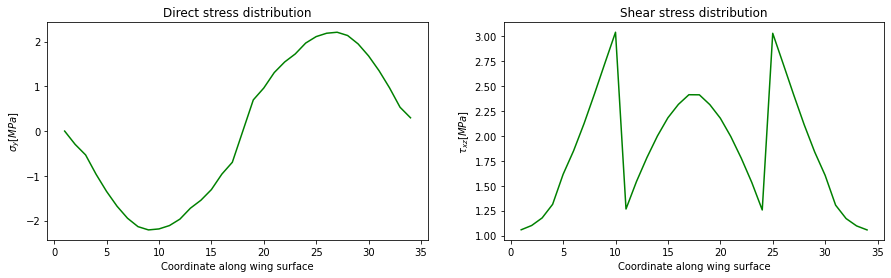

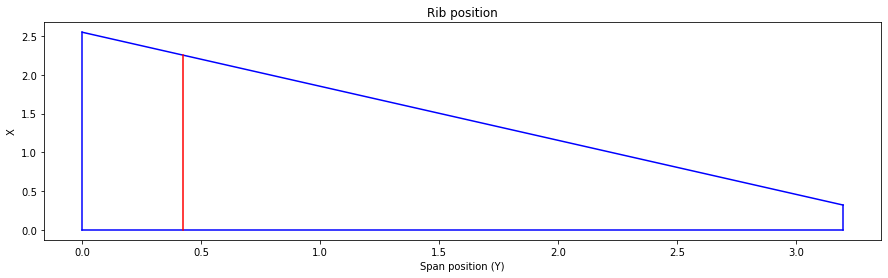





                                         -----------------------
                                        |                       |
                                        | CALCULATION OF RIB 3 |
                                        |                       |
                                         -----------------------


 -----------------
| STRINGER SIZING |
 -----------------
Stringer optimization for obtention of preliminary dimensions:
-----------------------------------
Optimization terminated successfully    (Exit mode 0)
            Current function value: [27.85141845]
            Iterations: 6
            Function evaluations: 8
            Gradient evaluations: 6
Optimization Complete
-----------------------------------
Number of stringers: 2
Web length: 10.04 mm
Web thickness: 1.0 mm
Flange length: 5.02 mm
Flange thickness: 1.0 mm


Stringer crippling check:
-----------------------------------
Stringer dimensions are not prone to suffer stringer crippling.
Stringer

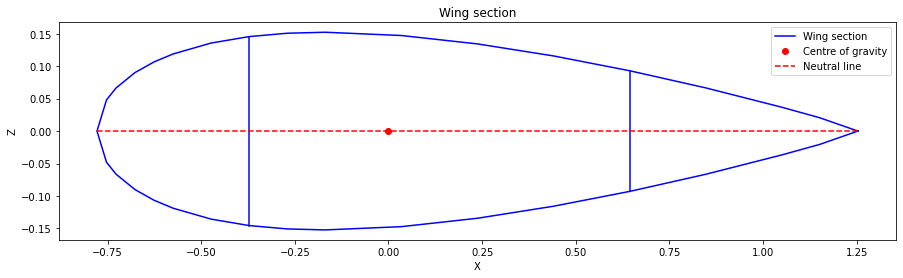

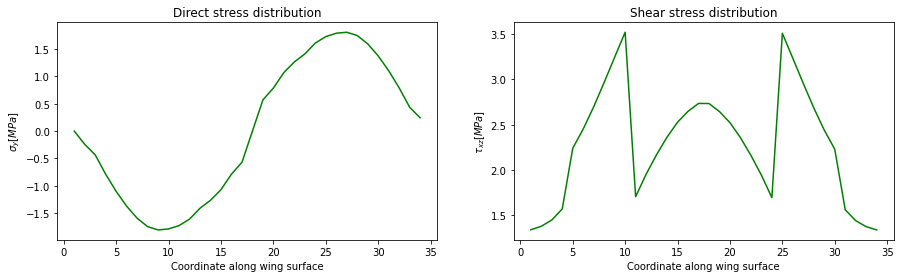

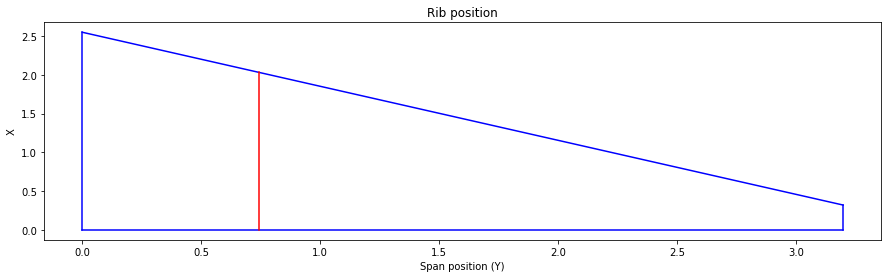





                                         -----------------------
                                        |                       |
                                        | CALCULATION OF RIB 4 |
                                        |                       |
                                         -----------------------


 -----------------
| STRINGER SIZING |
 -----------------
Stringer optimization for obtention of preliminary dimensions:
-----------------------------------
Optimization terminated successfully    (Exit mode 0)
            Current function value: [22.50195678]
            Iterations: 5
            Function evaluations: 8
            Gradient evaluations: 5
Optimization Complete
-----------------------------------
Number of stringers: 2
Web length: 10.0 mm
Web thickness: 1.0 mm
Flange length: 5.0 mm
Flange thickness: 1.0 mm


Stringer crippling check:
-----------------------------------
Stringer dimensions are not prone to suffer stringer crippling.
Stringer s

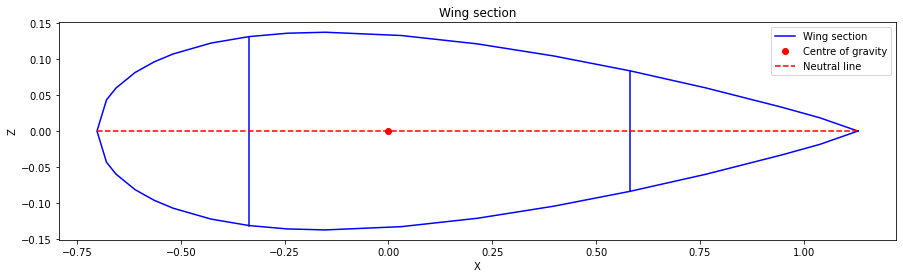

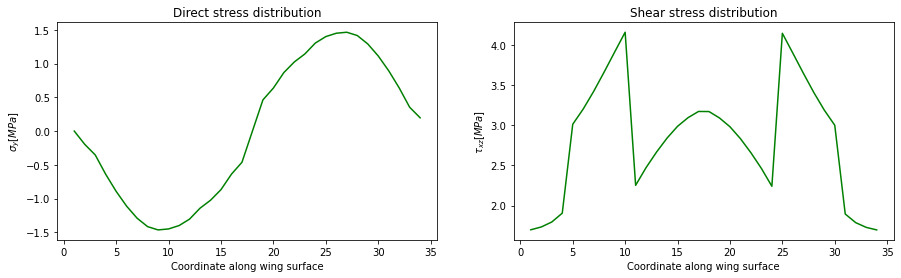

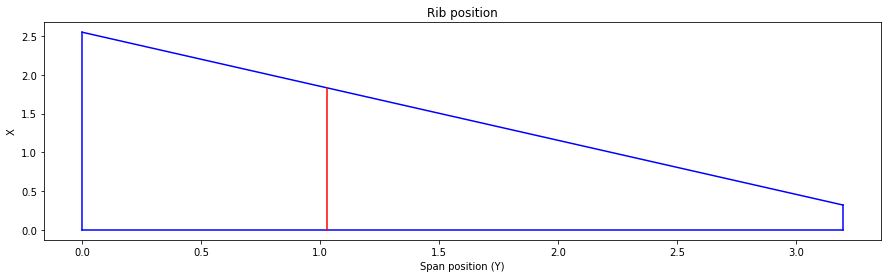





                                         -----------------------
                                        |                       |
                                        | CALCULATION OF RIB 5 |
                                        |                       |
                                         -----------------------


 -----------------
| STRINGER SIZING |
 -----------------
Stringer optimization for obtention of preliminary dimensions:
-----------------------------------
Optimization terminated successfully    (Exit mode 0)
            Current function value: 20.0
            Iterations: 1
            Function evaluations: 1
            Gradient evaluations: 1
Optimization Complete
-----------------------------------
Number of stringers: 1
Web length: 10.0 mm
Web thickness: 1.0 mm
Flange length: 5.0 mm
Flange thickness: 1.0 mm


Stringer crippling check:
-----------------------------------
Stringer dimensions are not prone to suffer stringer crippling.
Stringer sizing is 

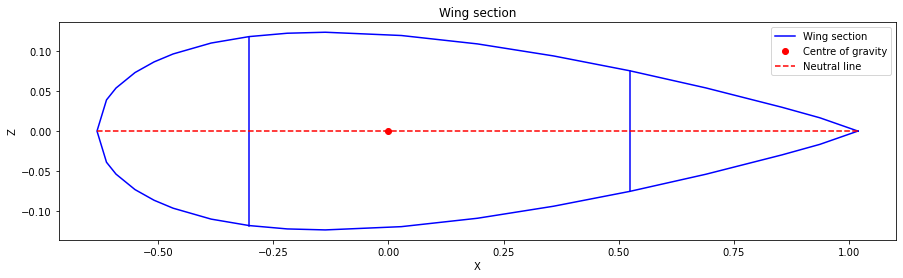

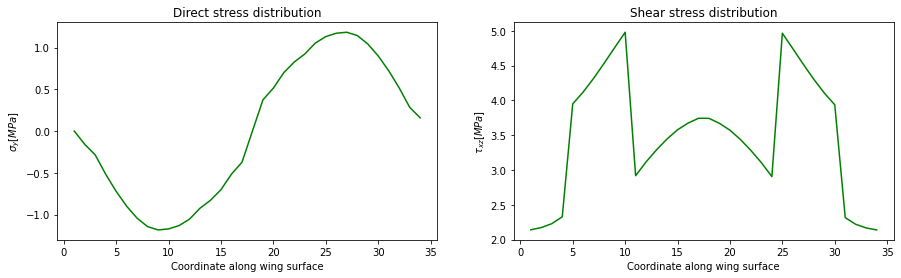

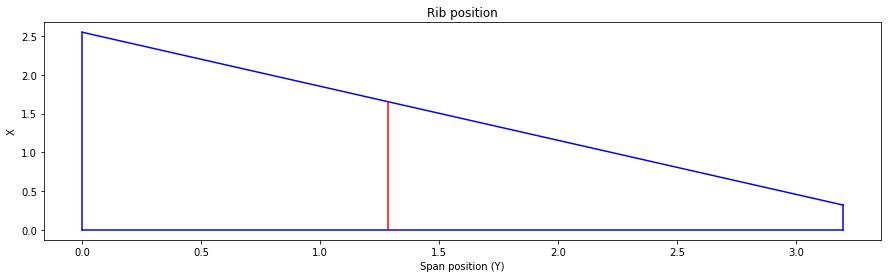





                                         -----------------------
                                        |                       |
                                        | CALCULATION OF RIB 6 |
                                        |                       |
                                         -----------------------


 -----------------
| STRINGER SIZING |
 -----------------
Stringer optimization for obtention of preliminary dimensions:
-----------------------------------
Optimization terminated successfully    (Exit mode 0)
            Current function value: 20.0
            Iterations: 1
            Function evaluations: 1
            Gradient evaluations: 1
Optimization Complete
-----------------------------------
Number of stringers: 1
Web length: 10.0 mm
Web thickness: 1.0 mm
Flange length: 5.0 mm
Flange thickness: 1.0 mm


Stringer crippling check:
-----------------------------------
Stringer dimensions are not prone to suffer stringer crippling.
Stringer sizing is 

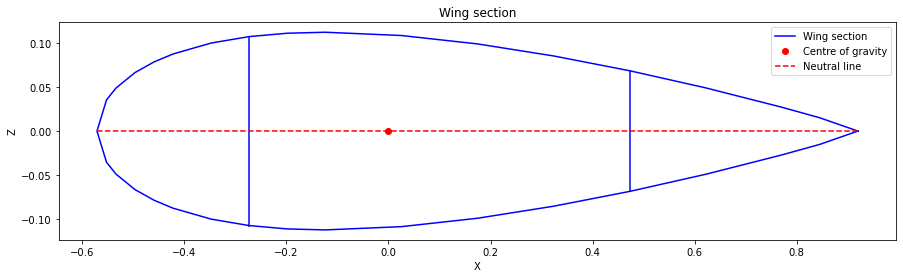

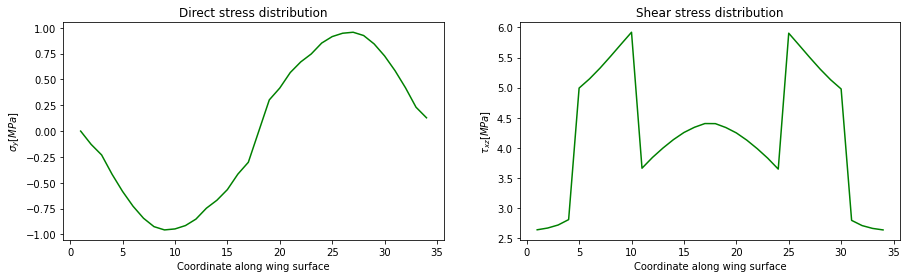

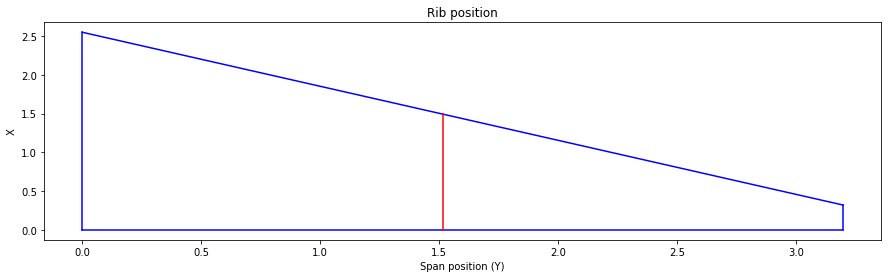





                                         -----------------------
                                        |                       |
                                        | CALCULATION OF RIB 7 |
                                        |                       |
                                         -----------------------


 -----------------
| STRINGER SIZING |
 -----------------
Stringer optimization for obtention of preliminary dimensions:
-----------------------------------
Optimization terminated successfully    (Exit mode 0)
            Current function value: 20.0
            Iterations: 1
            Function evaluations: 1
            Gradient evaluations: 1
Optimization Complete
-----------------------------------
Number of stringers: 1
Web length: 10.0 mm
Web thickness: 1.0 mm
Flange length: 5.0 mm
Flange thickness: 1.0 mm


Stringer crippling check:
-----------------------------------
Stringer dimensions are not prone to suffer stringer crippling.
Stringer sizing is 

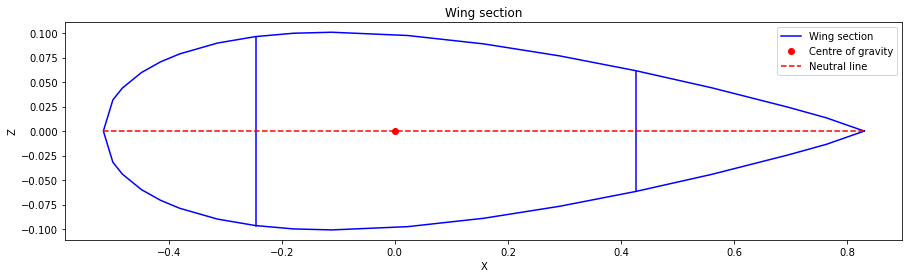

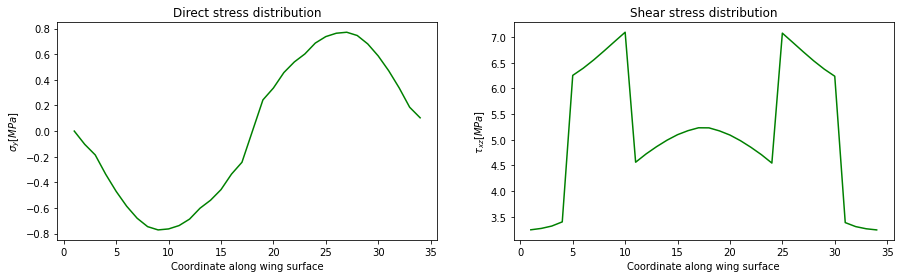

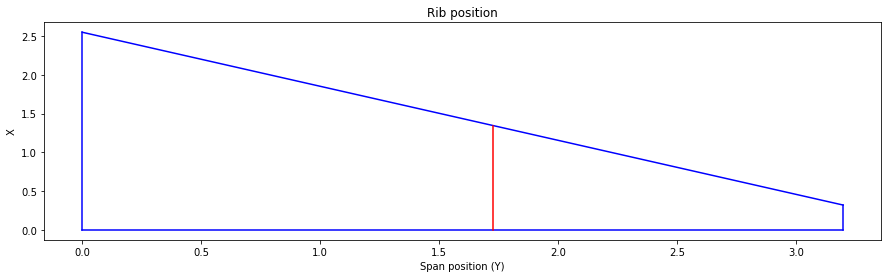





                                         -----------------------
                                        |                       |
                                        | CALCULATION OF RIB 8 |
                                        |                       |
                                         -----------------------


 -----------------
| STRINGER SIZING |
 -----------------
Stringer optimization for obtention of preliminary dimensions:
-----------------------------------
Optimization terminated successfully    (Exit mode 0)
            Current function value: 20.0
            Iterations: 1
            Function evaluations: 1
            Gradient evaluations: 1
Optimization Complete
-----------------------------------
Number of stringers: 1
Web length: 10.0 mm
Web thickness: 1.0 mm
Flange length: 5.0 mm
Flange thickness: 1.0 mm


Stringer crippling check:
-----------------------------------
Stringer dimensions are not prone to suffer stringer crippling.
Stringer sizing is 

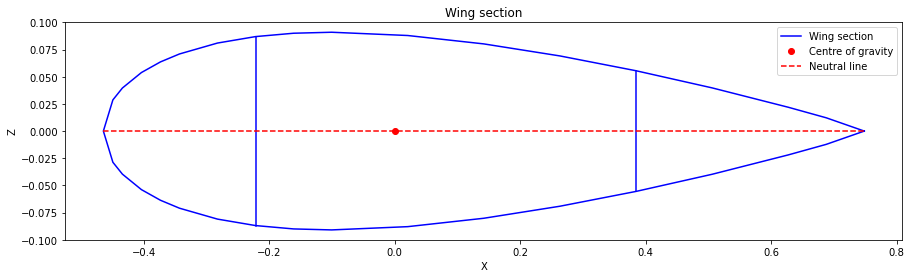

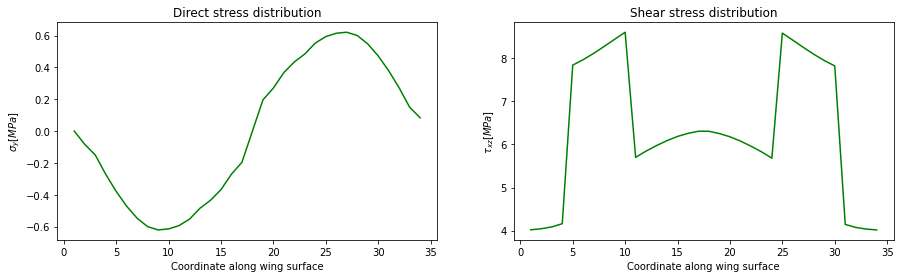

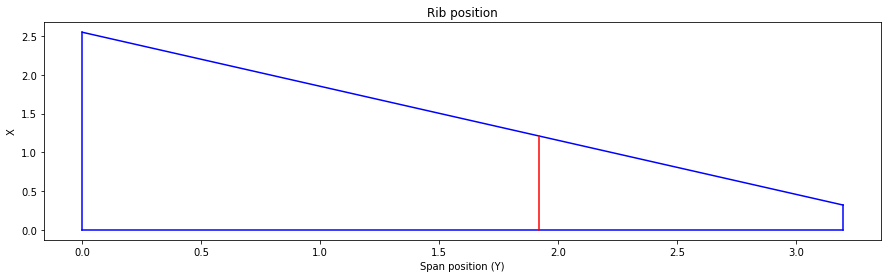





                                         -----------------------
                                        |                       |
                                        | CALCULATION OF RIB 9 |
                                        |                       |
                                         -----------------------


 -----------------
| STRINGER SIZING |
 -----------------
Stringer optimization for obtention of preliminary dimensions:
-----------------------------------
Optimization terminated successfully    (Exit mode 0)
            Current function value: 20.0
            Iterations: 1
            Function evaluations: 1
            Gradient evaluations: 1
Optimization Complete
-----------------------------------
Number of stringers: 1
Web length: 10.0 mm
Web thickness: 1.0 mm
Flange length: 5.0 mm
Flange thickness: 1.0 mm


Stringer crippling check:
-----------------------------------
Stringer dimensions are not prone to suffer stringer crippling.
Stringer sizing is 

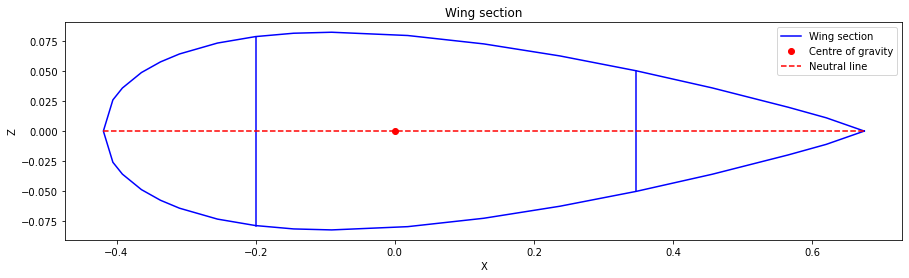

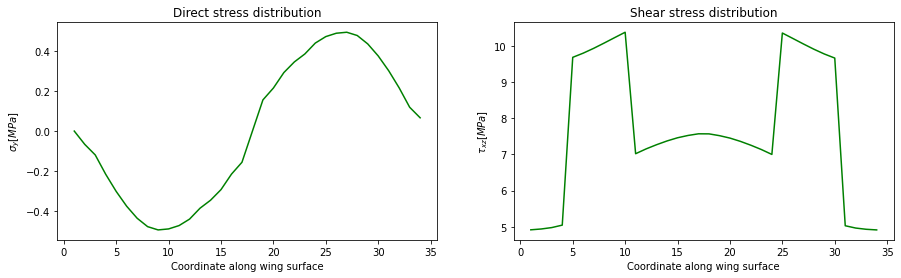

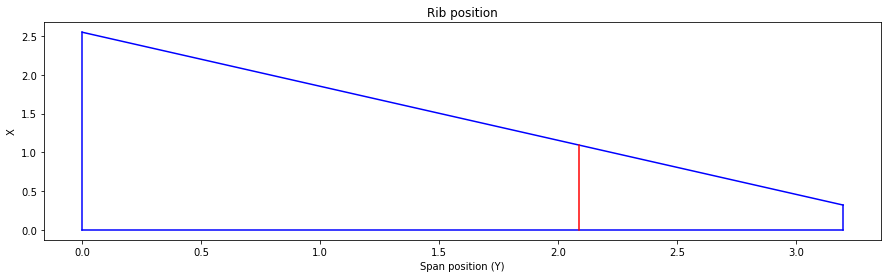





                                         -----------------------
                                        |                       |
                                        | CALCULATION OF RIB 10 |
                                        |                       |
                                         -----------------------


 -----------------
| STRINGER SIZING |
 -----------------
Stringer optimization for obtention of preliminary dimensions:
-----------------------------------
Optimization terminated successfully    (Exit mode 0)
            Current function value: 20.0
            Iterations: 1
            Function evaluations: 1
            Gradient evaluations: 1
Optimization Complete
-----------------------------------
Number of stringers: 1
Web length: 10.0 mm
Web thickness: 1.0 mm
Flange length: 5.0 mm
Flange thickness: 1.0 mm


Stringer crippling check:
-----------------------------------
Stringer dimensions are not prone to suffer stringer crippling.
Stringer sizing is

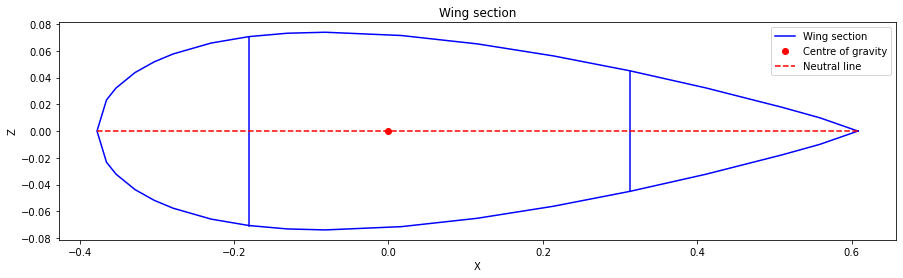

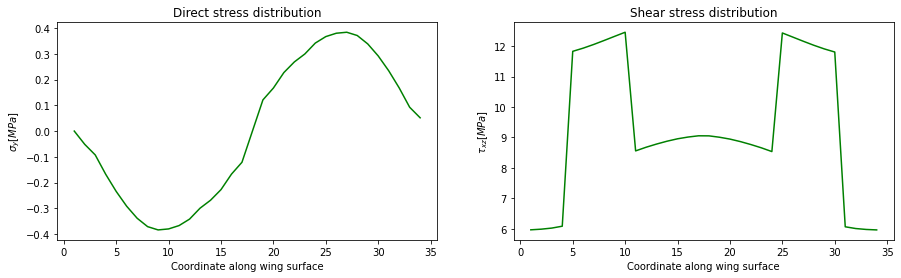

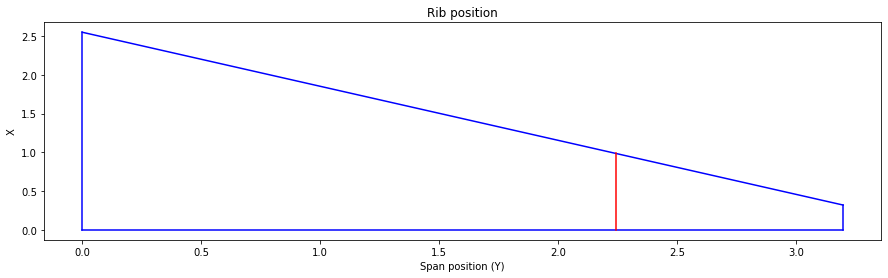





                                         -----------------------
                                        |                       |
                                        | CALCULATION OF RIB 11 |
                                        |                       |
                                         -----------------------


 -----------------
| STRINGER SIZING |
 -----------------
Stringer optimization for obtention of preliminary dimensions:
-----------------------------------
Optimization terminated successfully    (Exit mode 0)
            Current function value: 20.0
            Iterations: 1
            Function evaluations: 1
            Gradient evaluations: 1
Optimization Complete
-----------------------------------
Number of stringers: 1
Web length: 10.0 mm
Web thickness: 1.0 mm
Flange length: 5.0 mm
Flange thickness: 1.0 mm


Stringer crippling check:
-----------------------------------
Stringer dimensions are not prone to suffer stringer crippling.
Stringer sizing is

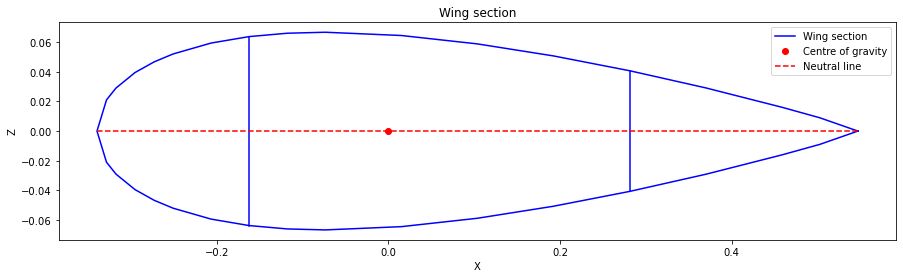

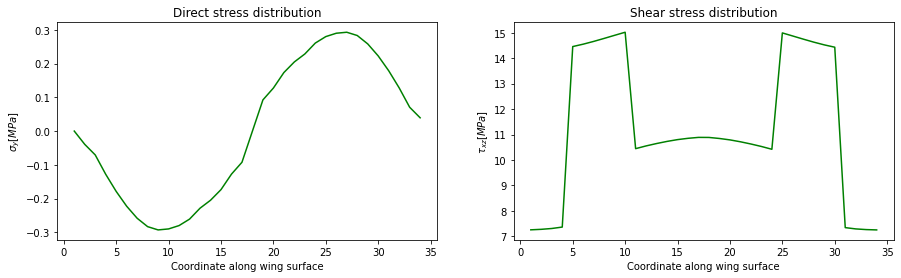

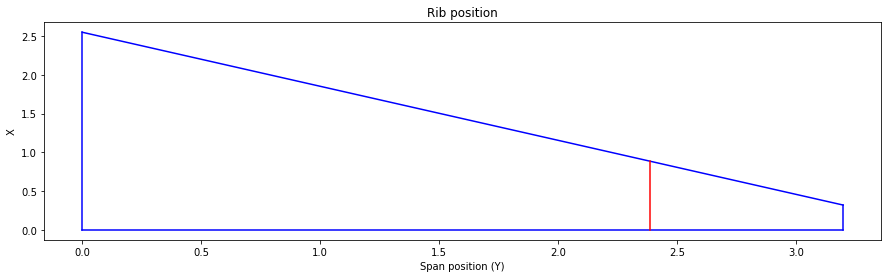





                                         -----------------------
                                        |                       |
                                        | CALCULATION OF RIB 12 |
                                        |                       |
                                         -----------------------


 -----------------
| STRINGER SIZING |
 -----------------
Stringer optimization for obtention of preliminary dimensions:
-----------------------------------
Optimization terminated successfully    (Exit mode 0)
            Current function value: 20.0
            Iterations: 1
            Function evaluations: 1
            Gradient evaluations: 1
Optimization Complete
-----------------------------------
Number of stringers: 1
Web length: 10.0 mm
Web thickness: 1.0 mm
Flange length: 5.0 mm
Flange thickness: 1.0 mm


Stringer crippling check:
-----------------------------------
Stringer dimensions are not prone to suffer stringer crippling.
Stringer sizing is

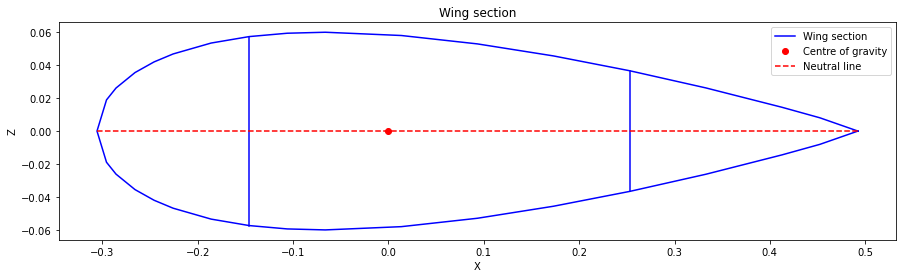

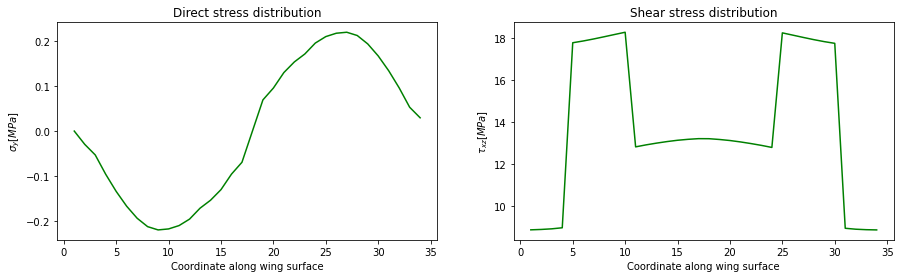

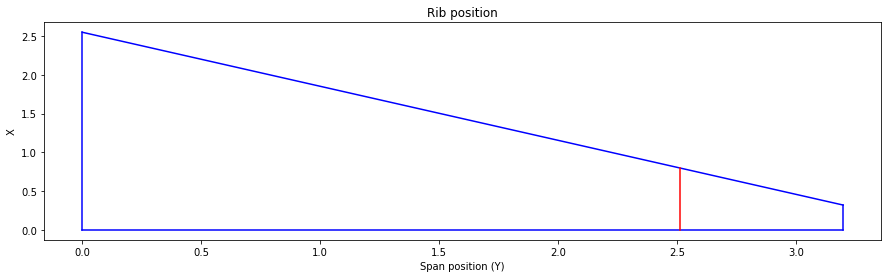





                                         -----------------------
                                        |                       |
                                        | CALCULATION OF RIB 13 |
                                        |                       |
                                         -----------------------


 -----------------
| STRINGER SIZING |
 -----------------
Stringer optimization for obtention of preliminary dimensions:
-----------------------------------
Optimization terminated successfully    (Exit mode 0)
            Current function value: 20.0
            Iterations: 1
            Function evaluations: 1
            Gradient evaluations: 1
Optimization Complete
-----------------------------------
Number of stringers: 1
Web length: 10.0 mm
Web thickness: 1.0 mm
Flange length: 5.0 mm
Flange thickness: 1.0 mm


Stringer crippling check:
-----------------------------------
Stringer dimensions are not prone to suffer stringer crippling.
Stringer sizing is

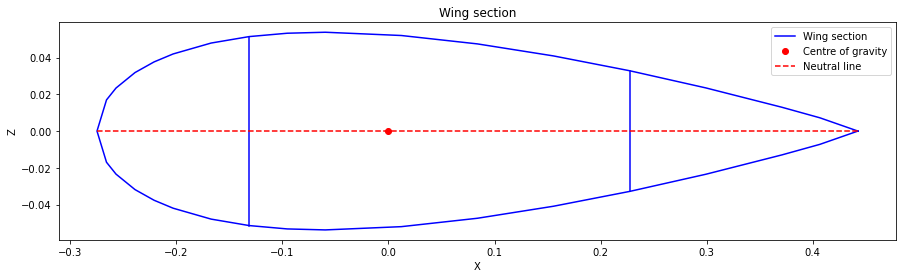

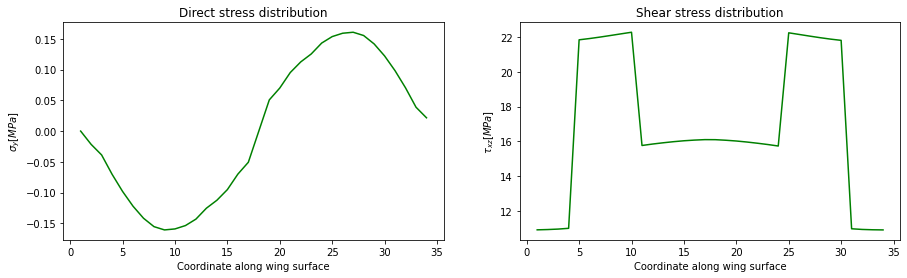

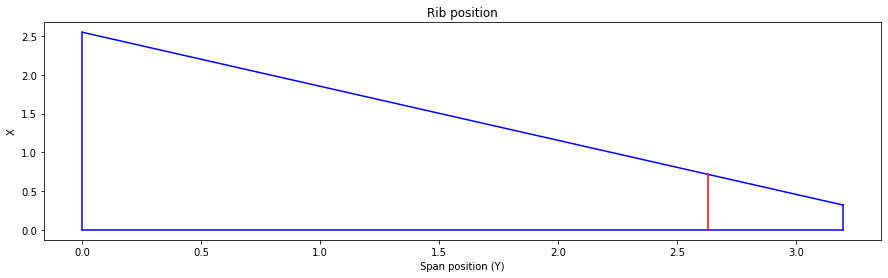





                                         -----------------------
                                        |                       |
                                        | CALCULATION OF RIB 14 |
                                        |                       |
                                         -----------------------


 -----------------
| STRINGER SIZING |
 -----------------
Stringer optimization for obtention of preliminary dimensions:
-----------------------------------
Optimization terminated successfully    (Exit mode 0)
            Current function value: 20.0
            Iterations: 1
            Function evaluations: 1
            Gradient evaluations: 1
Optimization Complete
-----------------------------------
Number of stringers: 1
Web length: 10.0 mm
Web thickness: 1.0 mm
Flange length: 5.0 mm
Flange thickness: 1.0 mm


Stringer crippling check:
-----------------------------------
Stringer dimensions are not prone to suffer stringer crippling.
Stringer sizing is

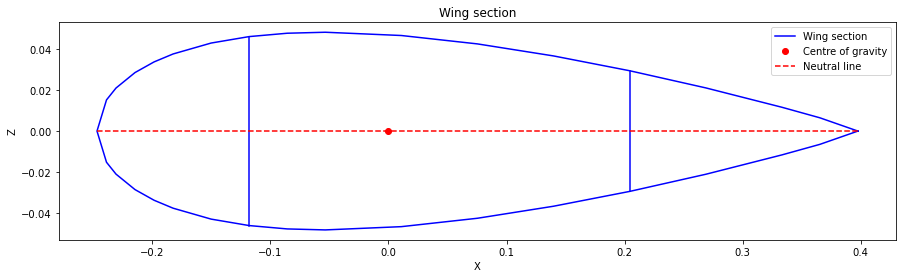

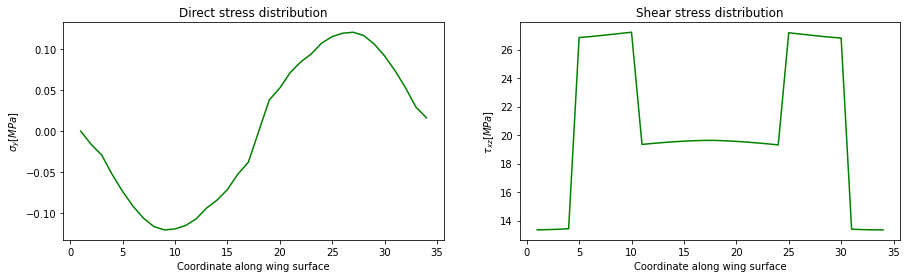

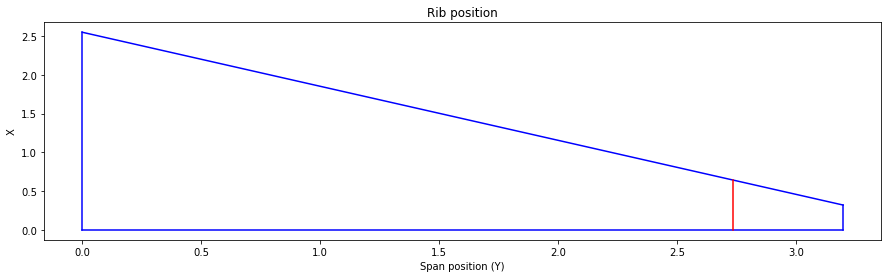





                                         -----------------------
                                        |                       |
                                        | CALCULATION OF RIB 15 |
                                        |                       |
                                         -----------------------


 -----------------
| STRINGER SIZING |
 -----------------
Stringer optimization for obtention of preliminary dimensions:
-----------------------------------
Optimization terminated successfully    (Exit mode 0)
            Current function value: 20.0
            Iterations: 1
            Function evaluations: 1
            Gradient evaluations: 1
Optimization Complete
-----------------------------------
Number of stringers: 1
Web length: 10.0 mm
Web thickness: 1.0 mm
Flange length: 5.0 mm
Flange thickness: 1.0 mm


Stringer crippling check:
-----------------------------------
Stringer dimensions are not prone to suffer stringer crippling.
Stringer sizing is

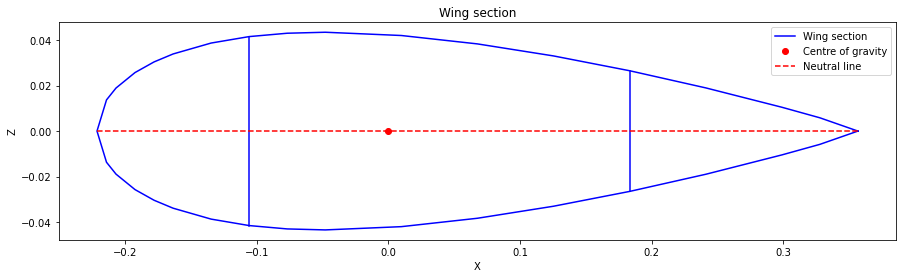

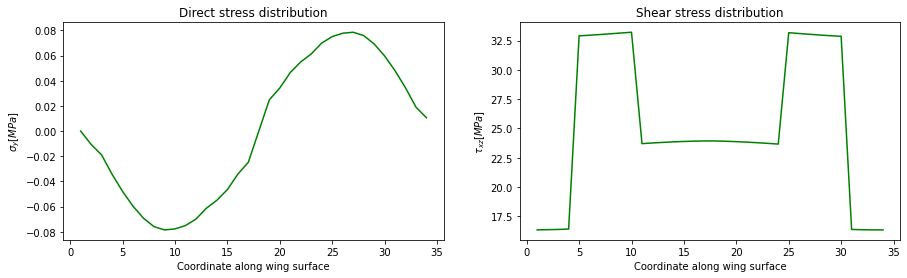

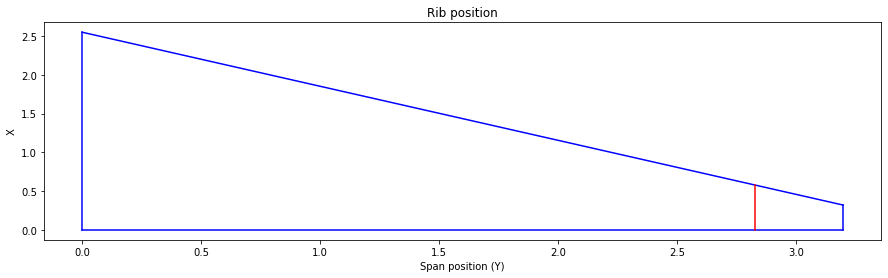





                                         -----------------------
                                        |                       |
                                        | CALCULATION OF RIB 16 |
                                        |                       |
                                         -----------------------


 -----------------
| STRINGER SIZING |
 -----------------
Stringer optimization for obtention of preliminary dimensions:
-----------------------------------
Optimization terminated successfully    (Exit mode 0)
            Current function value: 20.0
            Iterations: 1
            Function evaluations: 1
            Gradient evaluations: 1
Optimization Complete
-----------------------------------
Number of stringers: 1
Web length: 10.0 mm
Web thickness: 1.0 mm
Flange length: 5.0 mm
Flange thickness: 1.0 mm


Stringer crippling check:
-----------------------------------
Stringer dimensions are not prone to suffer stringer crippling.
Stringer sizing is

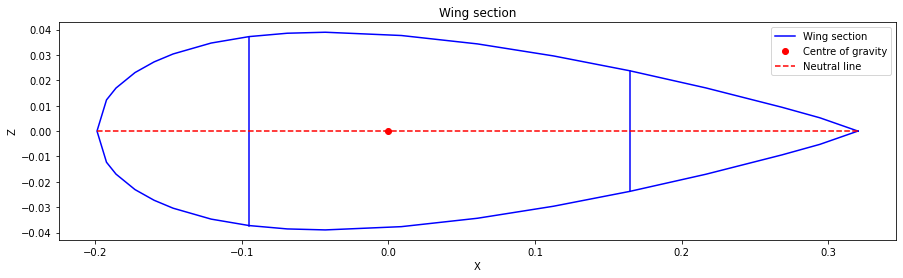

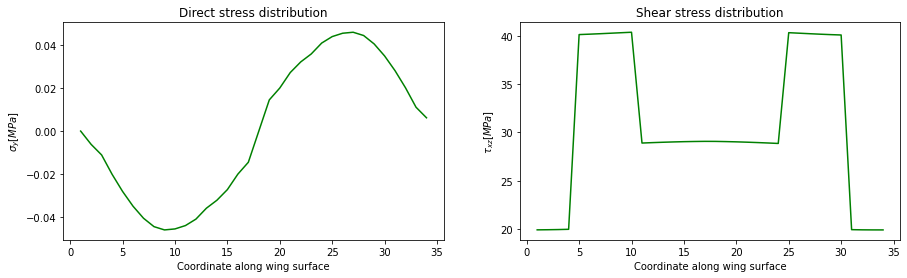

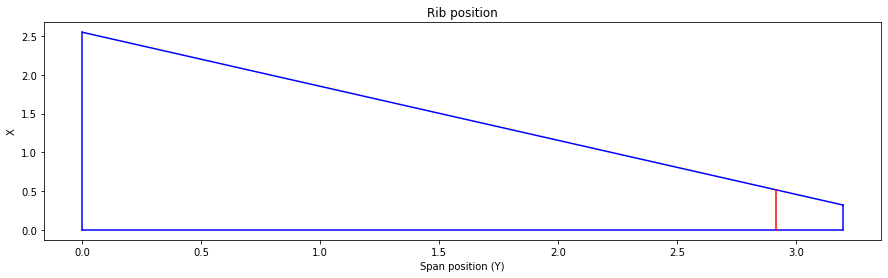





                                         -----------------------
                                        |                       |
                                        | CALCULATION OF RIB 17 |
                                        |                       |
                                         -----------------------


 -----------------
| STRINGER SIZING |
 -----------------
Stringer optimization for obtention of preliminary dimensions:
-----------------------------------
Optimization terminated successfully    (Exit mode 0)
            Current function value: 20.0
            Iterations: 1
            Function evaluations: 1
            Gradient evaluations: 1
Optimization Complete
-----------------------------------
Number of stringers: 1
Web length: 10.0 mm
Web thickness: 1.0 mm
Flange length: 5.0 mm
Flange thickness: 1.0 mm


Stringer crippling check:
-----------------------------------
Stringer dimensions are not prone to suffer stringer crippling.
Stringer sizing is

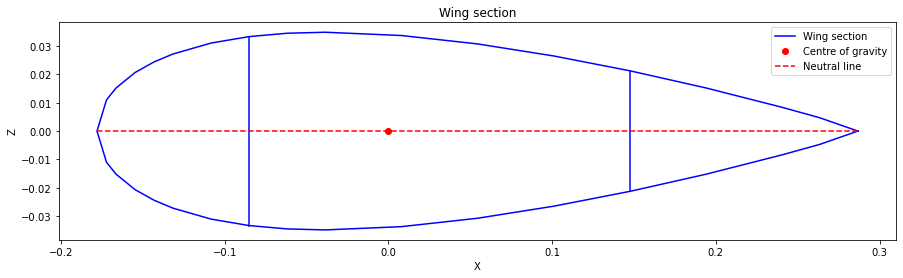

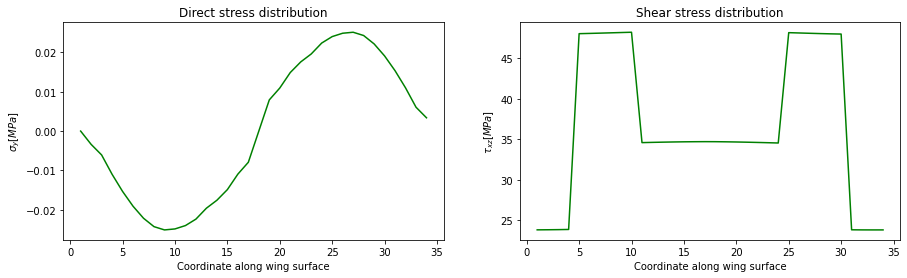

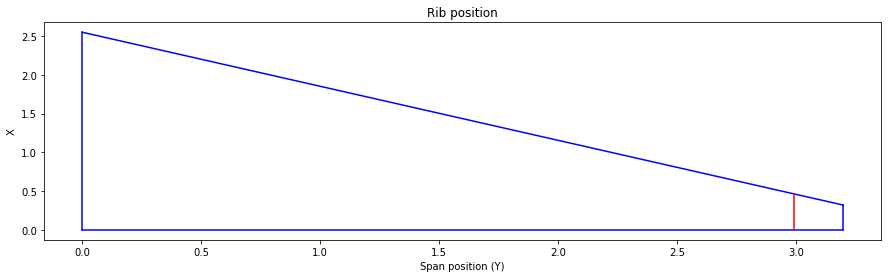





                                         -----------------------
                                        |                       |
                                        | CALCULATION OF RIB 18 |
                                        |                       |
                                         -----------------------


 -----------------
| STRINGER SIZING |
 -----------------
Stringer optimization for obtention of preliminary dimensions:
-----------------------------------
Optimization terminated successfully    (Exit mode 0)
            Current function value: 20.0
            Iterations: 1
            Function evaluations: 1
            Gradient evaluations: 1
Optimization Complete
-----------------------------------
Number of stringers: 1
Web length: 10.0 mm
Web thickness: 1.0 mm
Flange length: 5.0 mm
Flange thickness: 1.0 mm


Stringer crippling check:
-----------------------------------
Stringer dimensions are not prone to suffer stringer crippling.
Stringer sizing is

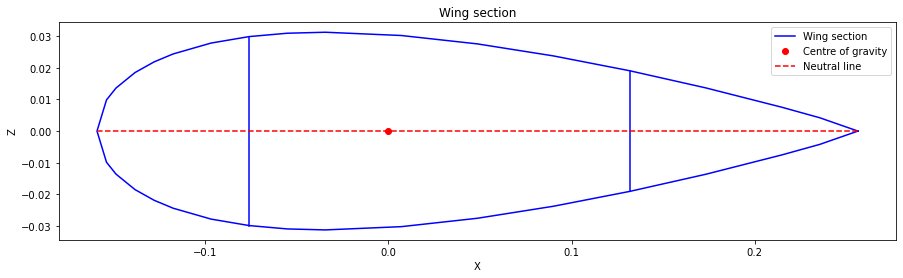

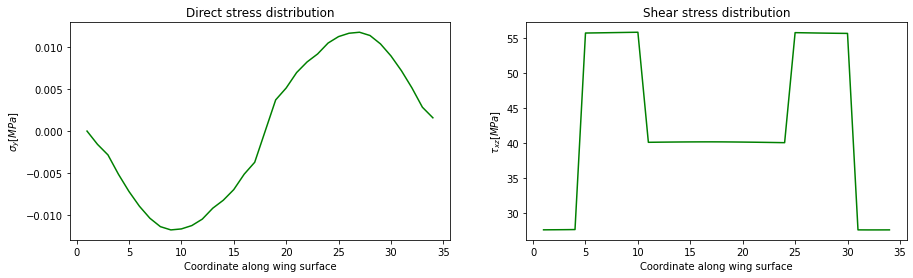

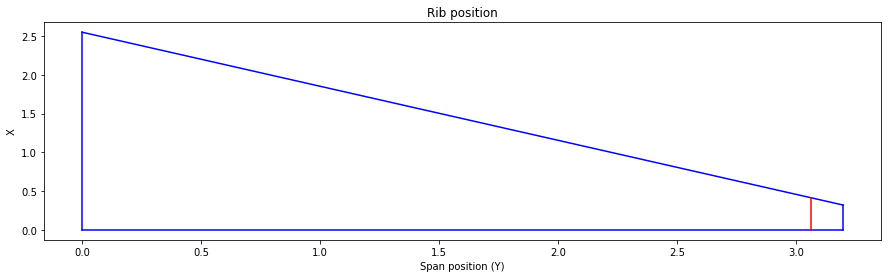





                                         -----------------------
                                        |                       |
                                        | CALCULATION OF RIB 19 |
                                        |                       |
                                         -----------------------


 -----------------
| STRINGER SIZING |
 -----------------
Stringer optimization for obtention of preliminary dimensions:
-----------------------------------
Optimization terminated successfully    (Exit mode 0)
            Current function value: 20.0
            Iterations: 1
            Function evaluations: 1
            Gradient evaluations: 1
Optimization Complete
-----------------------------------
Number of stringers: 1
Web length: 10.0 mm
Web thickness: 1.0 mm
Flange length: 5.0 mm
Flange thickness: 1.0 mm


Stringer crippling check:
-----------------------------------
Stringer dimensions are not prone to suffer stringer crippling.
Stringer sizing is

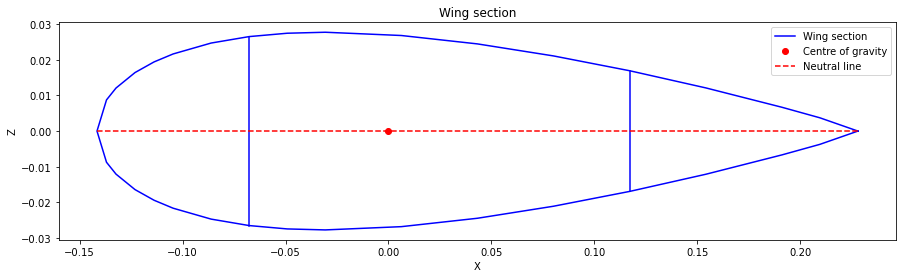

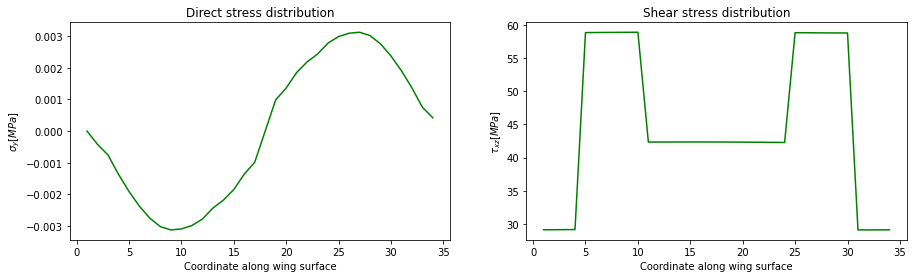

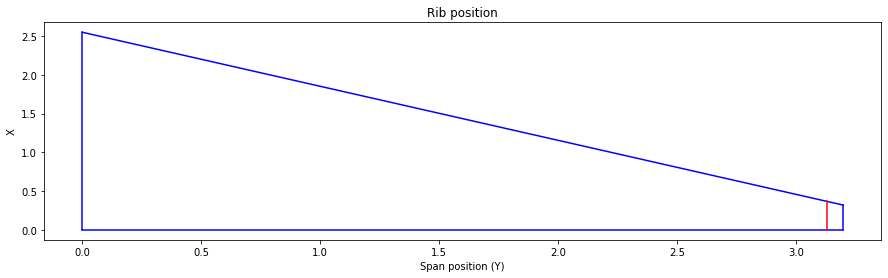





                                         -----------------------
                                        |                       |
                                        | CALCULATION OF RIB 20 |
                                        |                       |
                                         -----------------------


 -----------------
| STRINGER SIZING |
 -----------------
Stringer optimization for obtention of preliminary dimensions:
-----------------------------------
Optimization terminated successfully    (Exit mode 0)
            Current function value: 20.0
            Iterations: 1
            Function evaluations: 1
            Gradient evaluations: 1
Optimization Complete
-----------------------------------
Number of stringers: 1
Web length: 10.0 mm
Web thickness: 1.0 mm
Flange length: 5.0 mm
Flange thickness: 1.0 mm


Stringer crippling check:
-----------------------------------
Stringer dimensions are not prone to suffer stringer crippling.
Stringer sizing is

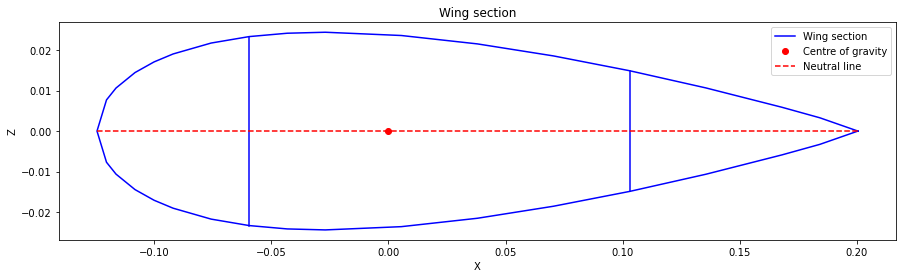

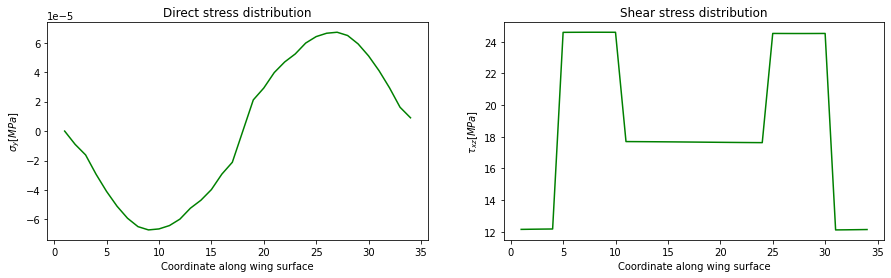

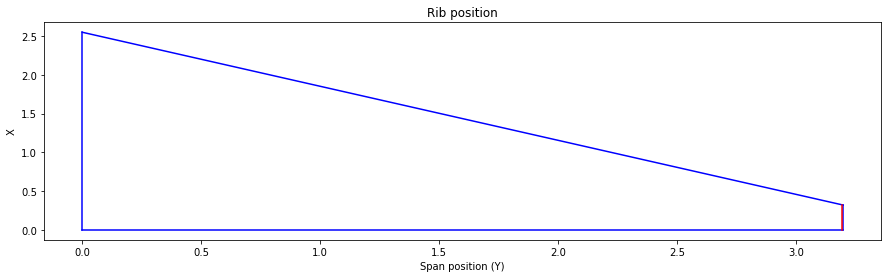





                                         -----------------------
                                        |                       |
                                        | WHOLE RIB ARRANGEMENT |
                                        |                       |
                                         -----------------------


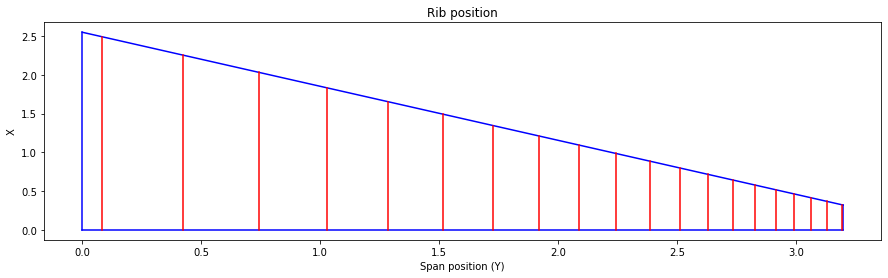





                                      ----------------------------
                                     |                            |
                                     | STRUCTURAL MASS ESTIMATION |
                                     |                            |
                                      ----------------------------
Total structural mass: 119.57 kg


In [4]:
from main import *
run_calculation()